In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
import os
import seaborn as sns

In [2]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist, pdist
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN

In [3]:
fileName = 'C:/Users/mcarp/Downloads/usa_00007.csv/usa_00007.csv'
file = pd.read_csv(fileName)
dfCDI = pd.DataFrame(file)

In [4]:
fileName2 = 'C:/Users/mcarp/Downloads/county_merged_vals - Sheet1.csv'
file2 = pd.read_csv(fileName2)
dfCty = pd.DataFrame(file2)

In [5]:
dfCDI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1887461 entries, 0 to 1887460
Data columns (total 40 columns):
 #   Column      Dtype  
---  ------      -----  
 0   YEAR        int64  
 1   MULTYEAR    int64  
 2   SAMPLE      int64  
 3   SERIAL      int64  
 4   CBSERIAL    int64  
 5   HHWT        float64
 6   CLUSTER     int64  
 7   CPI99       float64
 8   STATEFIP    int64  
 9   COUNTYFIP   int64  
 10  DENSITY     float64
 11  CITY        int64  
 12  PUMA        int64  
 13  STRATA      int64  
 14  GQ          int64  
 15  OWNERSHP    int64  
 16  OWNERSHPD   int64  
 17  OWNCOST     int64  
 18  RENTGRS     int64  
 19  HHINCOME    int64  
 20  CILAPTOP    int64  
 21  CIHISPEED   int64  
 22  PERNUM      int64  
 23  PERWT       float64
 24  FAMSIZE     int64  
 25  AGE         int64  
 26  RACE        int64  
 27  RACED       int64  
 28  HISPAN      int64  
 29  HISPAND     int64  
 30  EDUC        int64  
 31  EDUCD       int64  
 32  OCCSOC      object 
 33  INDNAIC

In [6]:
dfCDI.describe()

,YEAR,MULTYEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,CPI99,STATEFIP,COUNTYFIP,...,HISPAN,HISPAND,EDUC,EDUCD,INCTOT,FTOTINC,INCWAGE,MIGCOUNTY1,MOVEDIN,TRANTIME
count,1887461.0,1.887461e+06,1887461.0,1.887461e+06,1.887461e+06,1.887461e+06,1.887461e+06,1.887461e+06,1887461.0,1.887461e+06,...,1.887461e+06,1.887461e+06,1.887461e+06,1.887461e+06,1.887461e+06,1.887461e+06,1.887461e+06,1.887461e+06,1.887461e+06,1.887461e+06
mean,2019.0,2.017007e+03,201903.0,7.161752e+05,2.017008e+12,1.950090e+01,2.019007e+12,6.520000e-01,6.0,5.322070e+01,...,5.212203e-01,5.395687e+01,6.112827e+00,6.350181e+01,1.733883e+06,5.430318e+05,2.107476e+05,6.346545e+00,1.470495e+00,1.281491e+01
std,0.0,1.414209e+00,0.0,2.177509e+05,1.414360e+09,1.395353e+01,2.177509e+06,1.789791e-12,0.0,2.819463e+01,...,9.677537e-01,1.037007e+02,3.402226e+00,3.383771e+01,3.734217e+06,2.020262e+06,3.771700e+05,2.284799e+01,2.260702e+00,2.181307e+01
min,2019.0,2.015000e+03,201903.0,3.422620e+05,2.015000e+12,1.000000e+00,2.019003e+12,6.520000e-01,6.0,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-1.165400e+04,-1.575500e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2019.0,2.016000e+03,201903.0,5.280200e+05,2.016000e+12,1.100000e+01,2.019005e+12,6.520000e-01,6.0,3.700000e+01,...,0.000000e+00,0.000000e+00,3.000000e+00,3.000000e+01,1.018100e+04,4.072500e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2019.0,2.017000e+03,201903.0,7.092400e+05,2.017001e+12,1.500000e+01,2.019007e+12,6.520000e-01,6.0,5.900000e+01,...,0.000000e+00,0.000000e+00,6.000000e+00,6.500000e+01,3.590000e+04,8.449400e+04,2.357000e+04,0.000000e+00,0.000000e+00,0.000000e+00
75%,2019.0,2.018000e+03,201903.0,9.046820e+05,2.018001e+12,2.400000e+01,2.019009e+12,6.520000e-01,6.0,7.300000e+01,...,1.000000e+00,1.000000e+02,1.000000e+01,1.010000e+02,1.124000e+05,1.565180e+05,1.065370e+05,0.000000e+00,3.000000e+00,2.000000e+01
max,2019.0,2.019000e+03,201903.0,1.090399e+06,2.019010e+12,4.720000e+02,2.019011e+12,6.520000e-01,6.0,1.130000e+02,...,4.000000e+00,4.980000e+02,1.100000e+01,1.160000e+02,9.999999e+06,9.999999e+06,9.999990e+05,8.100000e+02,7.000000e+00,1.420000e+02


In [9]:
dfCDI['affrentdec']= dfCDI['RENTGRS']/dfCDI['FTOTINC'] 
dfCDI['affrentbin'] = [0 if x >=.3 else 1 for x in dfCDI['affrentdec']]
dfCDI['affrentbin'].value_counts()

1    1851700
0      35761
Name: affrentbin, dtype: int64

In [10]:
dfCDI['EDUC'].describe()

count    1.887461e+06
mean     6.112827e+00
std      3.402226e+00
min      0.000000e+00
25%      3.000000e+00
50%      6.000000e+00
75%      1.000000e+01
max      1.100000e+01
Name: EDUC, dtype: float64

In [11]:
dfCDI['EDUCbin'] = [1 if x >=8 else 0 for x in dfCDI['EDUC']]

In [12]:
dfCDI['CIHISPEED'].value_counts()

10    1401605
0      247588
20     238268
Name: CIHISPEED, dtype: int64

In [13]:
dfCDI['OWNERSHP'].value_counts()

1    1109153
2     698519
0      79789
Name: OWNERSHP, dtype: int64

In [24]:
dfCDI['TRANTIME'].value_counts()

0      1013705
30      117730
15      109131
20      107750
10       83994
        ...   
88           2
116          2
104          1
117          1
113          1
Name: TRANTIME, Length: 120, dtype: int64

In [15]:
dfCDI.shape

(1887461, 43)

In [17]:
dfCDI = dfCDI[dfCDI['OWNERSHP']!=0]
dfCDI.shape

(1807672, 43)

In [18]:
dfCDI.head()

,YEAR,MULTYEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,CPI99,STATEFIP,COUNTYFIP,...,INDNAICS,INCTOT,FTOTINC,INCWAGE,MIGCOUNTY1,MOVEDIN,TRANTIME,affrentdec,affrentbin,EDUCbin
0,2019,2015,201903,342262,2015000000008,20.0,2019003422623,0.652,6,59,...,424M,56113,56113,53955,0,2,10,0.021546,1,1
1,2019,2015,201903,342262,2015000000008,20.0,2019003422623,0.652,6,59,...,522M,0,56113,0,0,0,0,0.021546,1,0
2,2019,2015,201903,342263,2015000000009,15.0,2019003422633,0.652,6,81,...,5411,0,250353,0,85,1,0,0.000000,1,1
3,2019,2015,201903,342263,2015000000009,15.0,2019003422633,0.652,6,81,...,3341,250353,250353,248194,85,0,25,0.000000,1,1
4,2019,2015,201903,342263,2015000000009,15.0,2019003422633,0.652,6,81,...,0,9999999,250353,999999,85,0,0,0.000000,1,0


In [19]:
joined2019 = dfCDI.join(dfCty,on='COUNTYFIP',how='inner',lsuffix='str')

In [20]:
joined2019

,YEAR,MULTYEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,CPI99,STATEFIP,COUNTYFIPstr,...,Population - Households,Rural/Urban,Redstone Regions,WF Regions,CDI Regions,Population,DrinkingWater,EarlyEd,AirQuality,ProspNeigh
6,2019,2015,201903,342264,2015000000012,14.0,2019003422643,0.652,6,37,...,"172,190",Urban,Bay Area,Bay Area,Bay Area,"874,961",1.000000,0.744,26,0.900075
7,2019,2015,201903,342264,2015000000012,14.0,2019003422643,0.652,6,37,...,"172,190",Urban,Bay Area,Bay Area,Bay Area,"874,961",1.000000,0.744,26,0.900075
8,2019,2015,201903,342264,2015000000012,14.0,2019003422643,0.652,6,37,...,"172,190",Urban,Bay Area,Bay Area,Bay Area,"874,961",1.000000,0.744,26,0.900075
10,2019,2015,201903,342266,2015000000036,36.0,2019003422663,0.652,6,37,...,"172,190",Urban,Bay Area,Bay Area,Bay Area,"874,961",1.000000,0.744,26,0.900075
11,2019,2015,201903,342266,2015000000036,36.0,2019003422663,0.652,6,37,...,"172,190",Urban,Bay Area,Bay Area,Bay Area,"874,961",1.000000,0.744,26,0.900075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1883543,2019,2019,201903,1088952,2019001397740,12.0,2019010889523,0.652,6,25,...,"2,524",Rural,Northern San Joaquin Valley,Central Valley,Sierra Nevada,"14,310",0.999999,0.293,20,1.000000
1883544,2019,2019,201903,1088952,2019001397740,12.0,2019010889523,0.652,6,25,...,"2,524",Rural,Northern San Joaquin Valley,Central Valley,Sierra Nevada,"14,310",0.999999,0.293,20,1.000000
1883545,2019,2019,201903,1088952,2019001397740,12.0,2019010889523,0.652,6,25,...,"2,524",Rural,Northern San Joaquin Valley,Central Valley,Sierra Nevada,"14,310",0.999999,0.293,20,1.000000
1885408,2019,2019,201903,1089653,2019001404952,38.0,2019010896533,0.652,6,25,...,"2,524",Rural,Northern San Joaquin Valley,Central Valley,Sierra Nevada,"14,310",0.999999,0.293,20,1.000000


In [21]:
print(joined2019.columns.get_loc("affrentbin"))
print(joined2019.columns.get_loc("OWNERSHP"))
print(joined2019.columns.get_loc("EDUCbin"))
print(joined2019.columns.get_loc("CIHISPEED"))
print(joined2019.columns.get_loc("TRANTIME"))
print(joined2019.columns.get_loc("DrinkingWater"))
print(joined2019.columns.get_loc("AirQuality"))
print(joined2019.columns.get_loc("EarlyEd"))
print(joined2019.columns.get_loc("ProspNeigh"))

41
15
42
21
39
57
59
58
60


In [66]:
X = joined2019.iloc[:, [41,15,42,21,39,57,59,58,60]]

In [67]:
X.shape

(841841, 9)

In [68]:
print('Aff. Rent:',X['affrentbin'].max(), X['affrentbin'].min())
print('Home Ownership:',X['OWNERSHP'].max(), X['OWNERSHP'].min())
print('Education:',X['EDUCbin'].max(), X['EDUCbin'].min())
print('Broadband:',X['CIHISPEED'].max(), X['CIHISPEED'].min())
print('Commute Time:',X['TRANTIME'].max(), X['TRANTIME'].min())
print('Drinking Water:',X['DrinkingWater'].max(), X['DrinkingWater'].min())
print('Air Quality:',X['AirQuality'].max(), X['AirQuality'].min())
print('Early Ed.:',X['EarlyEd'].max(), X['EarlyEd'].min())
print('Prosp. Neighb:',X['ProspNeigh'].max(), X['ProspNeigh'].min())

Aff. Rent: 1 0
Home Ownership: 2 1
Education: 1 0
Broadband: 20 0
Commute Time: 142 0
Drinking Water: 1.0 0.916608627
Air Quality: 37 20
Early Ed.: 0.744 0.293
Prosp. Neighb: 1.0 0.581059171


In [69]:
X.loc[:,'affrentbin'] = (X['affrentbin'] - X['affrentbin'].max())/(X['affrentbin'].min() - X['affrentbin'].max()) # reversed
X.loc[:,'OWNERSHP'] = (X['OWNERSHP'] - X['OWNERSHP'].max())/(X['OWNERSHP'].min() - X['OWNERSHP'].max()) # reversed + normalized
X.loc[:,'CIHISPEED'] = X['CIHISPEED']/20
X.loc[:,'TRANTIME'] = (X['TRANTIME'] - X['TRANTIME'].max())/(X['TRANTIME'].min() - X['TRANTIME'].max()) # reversed
X.loc[:,'DrinkingWater'] = (X['DrinkingWater'] - X['DrinkingWater'].min())/(X['DrinkingWater'].max() - X['DrinkingWater'].min())
X.loc[:,'AirQuality'] = (X['AirQuality'] - X['AirQuality'].max())/(X['AirQuality'].min() - X['AirQuality'].max()) # reversed + normalized
X.loc[:,'EarlyEd'] = (X['EarlyEd'] - X['EarlyEd'].min())/(X['EarlyEd'].max() - X['EarlyEd'].min())
X.loc[:,'ProspNeigh'] = (X['ProspNeigh'] - X['ProspNeigh'].min())/(X['ProspNeigh'].max() - X['ProspNeigh'].min())

C:\Users\mcarp\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [70]:
X.describe()

,affrentbin,OWNERSHP,EDUCbin,CIHISPEED,TRANTIME,DrinkingWater,AirQuality,EarlyEd,ProspNeigh
count,841841.000000,841841.000000,841841.000000,841841.000000,841841.000000,841841.000000,841841.000000,841841.000000,841841.000000
mean,0.021492,0.583060,0.315193,0.518326,0.903578,0.991266,0.606142,0.767006,0.757864
std,0.145018,0.493053,0.464593,0.251062,0.158402,0.089665,0.255764,0.301279,0.185350
min,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000
25%,-0.000000,-0.000000,0.000000,0.500000,0.859155,1.000000,0.647059,0.578714,0.761482
50%,-0.000000,1.000000,0.000000,0.500000,1.000000,1.000000,0.647059,1.000000,0.761482
75%,-0.000000,1.000000,1.000000,0.500000,1.000000,1.000000,0.647059,1.000000,0.761482
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [71]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

C:\Users\mcarp\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


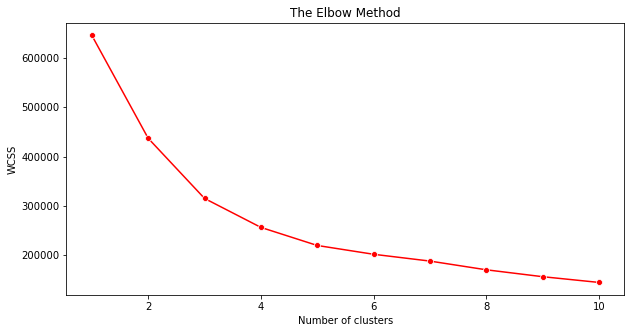

In [72]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [73]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
kmeans.fit(X)
print(kmeans.labels_)

[2 2 0 ... 3 3 3]


In [74]:
X['labels'] = kmeans.labels_
cluster_sum = X.groupby(by = 'labels').mean()
cluster_sum.head()

C:\Users\mcarp\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,affrentbin,OWNERSHP,EDUCbin,CIHISPEED,TRANTIME,DrinkingWater,AirQuality,EarlyEd,ProspNeigh
labels,,,,,,,,,
0,0.000000,1.00000,0.000000,0.523971,0.926338,0.999701,0.629546,0.801951,0.800601
1,0.026522,0.59821,0.207927,0.519827,0.940666,0.876212,0.077431,0.174367,0.184953
2,0.000000,1.00000,1.000000,0.530649,0.856881,0.999789,0.668367,0.775152,0.808570
3,0.053349,0.00000,0.000000,0.502799,0.920058,0.999763,0.635082,0.841245,0.793226
4,0.042260,0.00000,1.000000,0.518270,0.846562,0.999890,0.681132,0.824186,0.801820


In [75]:
X.describe()

,affrentbin,OWNERSHP,EDUCbin,CIHISPEED,TRANTIME,DrinkingWater,AirQuality,EarlyEd,ProspNeigh,labels
count,841841.000000,841841.000000,841841.000000,841841.000000,841841.000000,841841.000000,841841.000000,841841.000000,841841.000000,841841.000000
mean,0.021492,0.583060,0.315193,0.518326,0.903578,0.991266,0.606142,0.767006,0.757864,1.739216
std,0.145018,0.493053,0.464593,0.251062,0.158402,0.089665,0.255764,0.301279,0.185350,1.431490
min,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000
25%,-0.000000,-0.000000,0.000000,0.500000,0.859155,1.000000,0.647059,0.578714,0.761482,0.000000
50%,-0.000000,1.000000,0.000000,0.500000,1.000000,1.000000,0.647059,1.000000,0.761482,2.000000
75%,-0.000000,1.000000,1.000000,0.500000,1.000000,1.000000,0.647059,1.000000,0.761482,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [76]:
Xcorr=X.iloc[:, [0,1,2,3,4,5,6,7,8]]
Xcorr.head()

,affrentbin,OWNERSHP,EDUCbin,CIHISPEED,TRANTIME,DrinkingWater,AirQuality,EarlyEd,ProspNeigh
6,-0.0,1.0,1,0.5,1.000000,1.0,0.647059,1.0,0.761482
7,-0.0,1.0,1,0.5,0.852113,1.0,0.647059,1.0,0.761482
8,-0.0,1.0,0,0.5,1.000000,1.0,0.647059,1.0,0.761482
10,-0.0,1.0,0,0.5,0.683099,1.0,0.647059,1.0,0.761482
11,-0.0,1.0,0,0.5,1.000000,1.0,0.647059,1.0,0.761482


<AxesSubplot:>

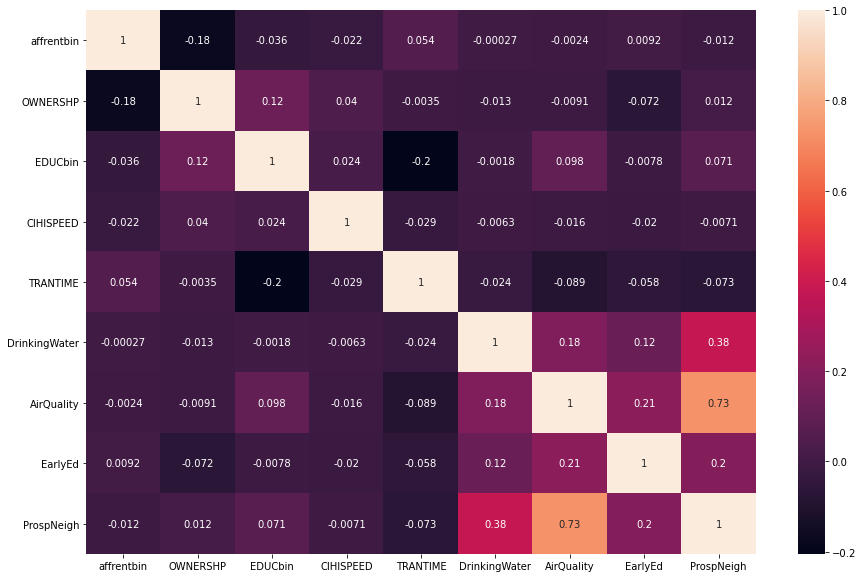

In [77]:
plt.subplots(figsize=(15,10))
sns.heatmap(Xcorr.corr(), annot = True)

In [ ]:
## provide descriptive statistics of clusters and their values